<a href="https://colab.research.google.com/github/tajain07/neural-network-playground/blob/master/Autoencoder_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(00)
'''

"\n# http://pytorch.org/\nfrom os.path import exists\nfrom wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag\nplatform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())\ncuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\\.\\([0-9]*\\)\\.\\([0-9]*\\)$/cu\x01\x02/'\naccelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'\n\n!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision\n\n# Restart Kernel\n# This workaround is needed to properly upgrade PIL on Google Colab.\nimport os\nos._exit(00)\n"

In [0]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [0]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, 
                            download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, 
                            download=True, transform=transform)

In [0]:
num_workers = 0
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader =  torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

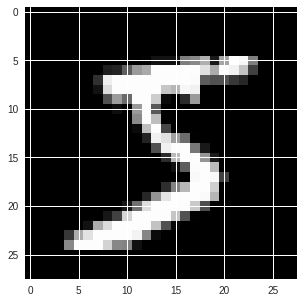

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    
    #encoder 
    #784 --> encoding_dim
    self.fc1 = nn.Linear(28 * 28, encoding_dim)
    
    #decoder
    #encoding_dim --> 784
    self.fc2 = nn.Linear(encoding_dim, 28*28)
 
  def forward(self, x):
    x = F.relu(self.fc1(x))
    #ouput latyer - (sigmoid for scaling from 0 to 1)
    x = torch.sigmoid(self.fc2(x))
    return x
  
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)
 

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [10]:
n_epochs = 20

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    for data in train_loader:
      images, _ = data
      # flatten images
      images = images.view(images.size(0), -1)
      
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, images)
      
      # backward pass: compute gradient of the loss with respect to model params
      loss.backward()
      
      # perform a single optimization step (parameter update)
      optimizer.step()
      train_loss += loss.item()*images.size(0)
      
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.283931
Epoch: 2 	Training Loss: 0.272994
Epoch: 3 	Training Loss: 0.268790
Epoch: 4 	Training Loss: 0.266304
Epoch: 5 	Training Loss: 0.264843
Epoch: 6 	Training Loss: 0.263794
Epoch: 7 	Training Loss: 0.262996
Epoch: 8 	Training Loss: 0.262332
Epoch: 9 	Training Loss: 0.261750
Epoch: 10 	Training Loss: 0.261238
Epoch: 11 	Training Loss: 0.260752
Epoch: 12 	Training Loss: 0.260324
Epoch: 13 	Training Loss: 0.259929
Epoch: 14 	Training Loss: 0.259512
Epoch: 15 	Training Loss: 0.259098
Epoch: 16 	Training Loss: 0.258738
Epoch: 17 	Training Loss: 0.258419
Epoch: 18 	Training Loss: 0.258116
Epoch: 19 	Training Loss: 0.257824
Epoch: 20 	Training Loss: 0.257544


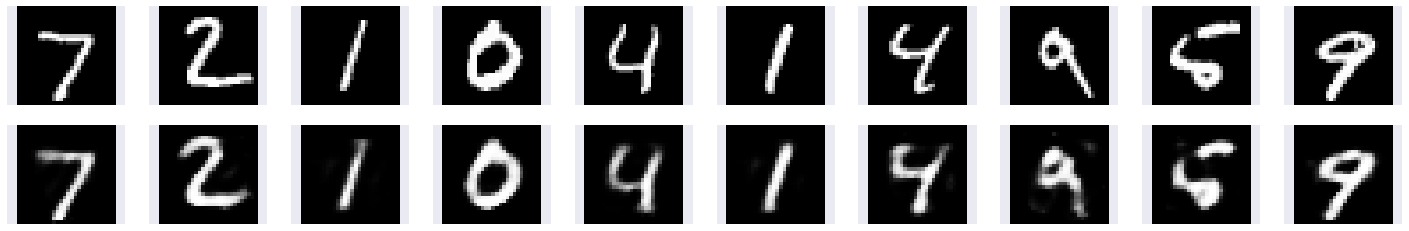

In [11]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, output], axes):
  for img, ax in zip(images, row):
    ax.imshow(np.squeeze(img), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)